# Group Project 1
 - presentation date - Nov 20
 - resubmission of presentation slides and code ntoebook due on Nov 23. 
 - grade weight: 25 credits (25%) of final grade   
 - Goal: Practice a real-world classicification problem on Kaggle to improve your problem-solving skills and coding proficiency.
 - grade scheme: 
    - group presentaton: 10 points
    - completeness of project code 8 points
    - code with comments 5 points
    - f-1 performance evaluation up to 2 points 
      * top 2 performance groups earn 2 points 
      * middel 2 performance groups earn 1 point
      * bottom 2 performance groups earn 0 point

Introduton:
In group project 1, students will voluntarily group into 6 groups to collaborate on a prediction task. The task is to predict the likelihood between 0 and 1 of accidents on different types of roads as announced @ 

<center>https://www.kaggle.com/competitions/playground-series-s5e10</center>



Dataset Description: 
The dataset for this project was generated from a deep learning model trained on the Simulated Roads Accident dataset. Feature distributions are close to, but not exactly the same, as the original.     

Data File (provided in Canvas):
train.csv - the training dataset; dependent variable is `accident_risk` a the continuous [0-1] target ground truth


# What I will like to see are the following sections: 
1) For presentation, 
  - part 1: a brief introduction of the project
  - part 2: most important outoputs of your code
  - part 3: Conclusion and discussion
2) For coding practice
  - organize your submission clean and clear with comments
  - make sure your code can be run from start to end without error
  - use functions where appropriate to avoid redundant code  
  - use markdown cells to explain your code where appropriate
  - make sure to run sufficient perforamnce evaluation to justify model choice, in particular, f1 score 

# Hints
 - remember to randomly split data into 2 parts, one for trainig, the other for perforamnce evaluation  
 - feel free to explore the code or discussion posted in Kaggle community @ https://www.kaggle.com/competitions/playground-series-s5e10/code
 - *** <font color = "red"> Use the shared code carefully since those code are not validated </font> ***

In [4]:
import pandas as pd

In [5]:
train = pd.read_csv('/Users/josephnguyen/Downloads/train.csv')
test = pd.read_csv('/Users/josephnguyen/Downloads/train.csv')

In [6]:
print("Missing values per column:")
print(train.isna().sum())
print("Number of duplicate rows:", train.duplicated().sum())
print(train.dtypes)
train.describe()


Missing values per column:
id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64
Number of duplicate rows: 0
id                          int64
road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
accident_risk             float64
dtype: object


,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [7]:


from sklearn.model_selection import train_test_split

print("Train Shape:", train.shape)
print(train.head())

# Do NOT modify accident_risk. It is your true label.
# Separate features and target
X = train.drop('accident_risk', axis=1)
y = train['accident_risk']

# Create a real validation set
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)




Train Shape: (517754, 14)
   id road_type  num_lanes  curvature  speed_limit  lighting weather  \
0   0     urban          2       0.06           35  daylight   rainy   
1   1     urban          4       0.99           35  daylight   clear   
2   2     rural          4       0.63           70       dim   clear   
3   3   highway          4       0.07           35       dim   rainy   
4   4     rural          1       0.58           60  daylight   foggy   

   road_signs_present  public_road time_of_day  holiday  school_season  \
0               False         True   afternoon    False           True   
1                True        False     evening     True           True   
2               False         True     morning     True          False   
3                True         True     morning    False          False   
4               False        False     evening     True          False   

   num_reported_accidents  accident_risk  
0                       1           0.13  
1         

In [10]:
#Notes

#Load data
#Clean data
#Encode categories
#Split train / validation
#Train model
#Evaluate model
#(Optional) basic feature engineering if relevant



'Load data\nClean data\nEncode categories\nSplit train / validation\nTrain model\nEvaluate model\n(Optional) basic feature engineering if relevant\n'

In [12]:
# 3. ENCODING
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)



In [13]:
# 4. MODEL SELECTION
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

In [17]:
# 5. PIPELINE + TRAIN
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('model', model)
])

pipeline.fit(X_train, y_train)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
# 6. EVALUATION
from sklearn.metrics import mean_squared_error

y_pred = pipeline.predict(X_val)

mse = mean_squared_error(y_val, y_pred)   # this returns MSE
rmse = mse ** 0.5                         # manually take the square root

print("Validation RMSE:", rmse)

Validation RMSE: 0.05780532857988099


In [19]:
import numpy as np
from sklearn.metrics import f1_score

def risk_to_probability(risk_values):
    risk_values = np.asarray(risk_values)
    return 1 / (1 + np.exp(-risk_values))

# Use regression predictions from before
probs = risk_to_probability(y_pred)

# Ground truth → binary using threshold 0.5
y_true_binary = (y_val >= 0.5).astype(int)

# Predicted → binary using threshold 0.5
y_pred_binary = (probs >= 0.5).astype(int)

f1 = f1_score(y_true_binary, y_pred_binary)
print("F1 Score (threshold=0.5):", f1)


F1 Score (threshold=0.5): 0.3130208121207185


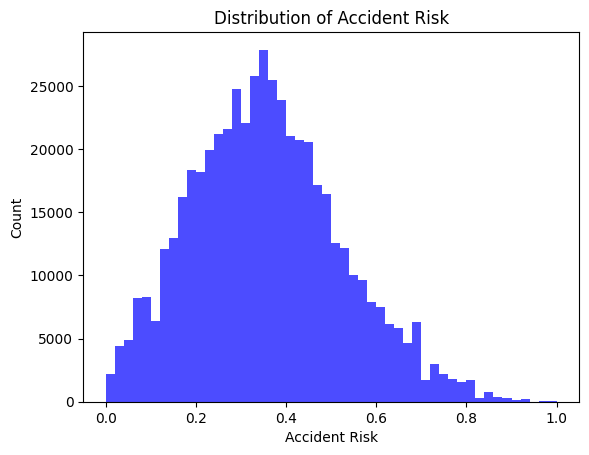

In [20]:
import matplotlib.pyplot as plt

plt.hist(train['accident_risk'], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Accident Risk")
plt.xlabel("Accident Risk")
plt.ylabel("Count")
plt.show()


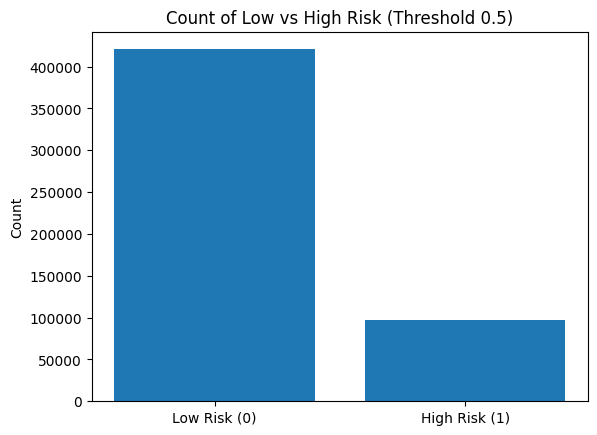

In [21]:
binary_labels = (train['accident_risk'] >= 0.5).astype(int)

plt.bar(['Low Risk (0)', 'High Risk (1)'], binary_labels.value_counts().sort_index())
plt.title("Count of Low vs High Risk (Threshold 0.5)")
plt.ylabel("Count")
plt.show()


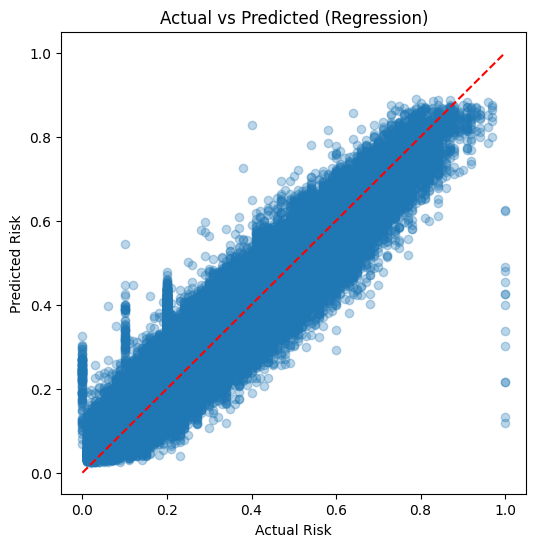

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([0,1],[0,1],'r--')
plt.xlabel("Actual Risk")
plt.ylabel("Predicted Risk")
plt.title("Actual vs Predicted (Regression)")
plt.show()


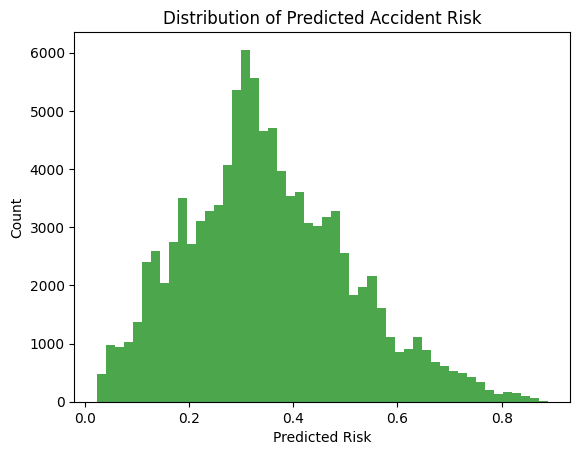

In [23]:
plt.hist(y_pred, bins=50, color='green', alpha=0.7)
plt.title("Distribution of Predicted Accident Risk")
plt.xlabel("Predicted Risk")
plt.ylabel("Count")
plt.show()


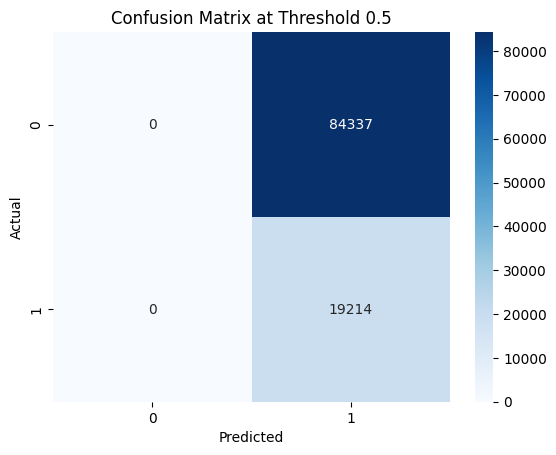

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_binary, y_pred_binary)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix at Threshold 0.5")
plt.show()
